In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sn 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# machine learning library use for product recommendation
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore

In [3]:
# Read Json file from AMAZON

df = pd.read_json('./Electronics_5.json',lines=True,orient='columns')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
# Renaming 
amazon_df = df.rename(columns= {'reviewerID': 'customerID','asin': 'productID','reviewerName':'custumerName',
                                'overall':'ratings','unixReviewTime':'timestamp',
                               'reviewTime':'customerReviewTime'})
amazon_df.head()

,customerID,productID,custumerName,helpful,reviewText,ratings,summary,timestamp,customerReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
# Chọn cột nhập để phân tích
data = amazon_df[['customerID','productID','ratings','timestamp']]
data.head()

,customerID,productID,ratings,timestamp
0,AO94DHGC771SJ,0528881469,5,1370131200
1,AMO214LNFCEI4,0528881469,1,1290643200
2,A3N7T0DY83Y4IG,0528881469,3,1283990400
3,A1H8PY3QHMQQA0,0528881469,2,1290556800
4,A24EV6RXELQZ63,0528881469,1,1317254400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   customerID  1689188 non-null  object
 1   productID   1689188 non-null  object
 2   ratings     1689188 non-null  int64 
 3   timestamp   1689188 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [7]:
data.shape

(1689188, 4)

In [8]:
# Bỏ cột thời gian
data = data.drop('timestamp', axis=1)
data.head()

,customerID,productID,ratings
0,AO94DHGC771SJ,0528881469,5
1,AMO214LNFCEI4,0528881469,1
2,A3N7T0DY83Y4IG,0528881469,3
3,A1H8PY3QHMQQA0,0528881469,2
4,A24EV6RXELQZ63,0528881469,1


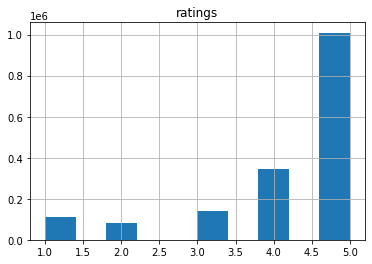

In [9]:
data.hist('ratings', bins = 10);

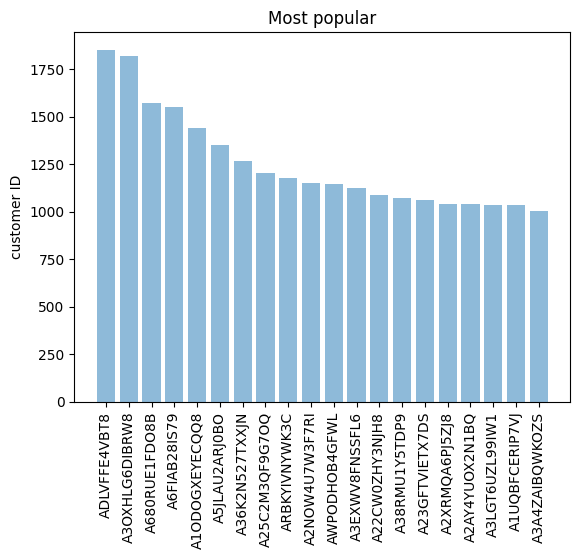

In [10]:
popular = data[['customerID','ratings']].groupby('customerID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['customerID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('customer ID')
plt.title('Most popular')
 
plt.show()

In [11]:
# tìm người dùng duy nhất
data.customerID.value_counts()

ADLVFFE4VBT8      431
A3OXHLG6DIBRW8    407
A6FIAB28IS79      367
A680RUE1FDO8B     352
A5JLAU2ARJ0BO     351
                 ... 
AG9X8KKVJA99B       5
A2XMLBREYIEGGG      5
A3NZJXUBW6YEGL      5
A3030L8GMEQD3F      5
A1FQ3HRVXA4A5B      5
Name: customerID, Length: 192403, dtype: int64

In [12]:
# create user EDA function go get some information about
def cust_info(data): 
    uniqueCustID = len(data['customerID'].unique())
    uniPrctID = len(data['productID'].unique())
    UniRating = data['ratings'].unique()
    min_Rating = data[(data['ratings'] < 2)]
    min_Prod = len(min_Rating['productID'].unique())
    med_Rating = data[(data['ratings']< 2) & (data['ratings']< 4)]
    max_Rating = data[(data['ratings'] >= 4)]
    avg_Rating_prod = data.groupby('productID').sum() / data.groupby('productID').count()
    avg_Rating_prod.drop('customerID',axis=1,inplace=True)
    MaxPr =avg_Rating_prod.nlargest(10,'ratings')
    
    print(f'Number for unique users:  {uniqueCustID}')  
    print(f'Number of unique Products:  {uniPrctID}') 
    print(f'Unique Rating : {UniRating} and  Minimum Rtaing by Products:  {min_Prod}')
    print(f'Number of unique products rated medium: {len(med_Rating.productID.unique())}')
    print(f'Number of unique products rated maximum: {len(max_Rating.productID.unique())}')
    print(f'Top 10 Highly rated products ----------- {MaxPr}')

cust_info(data)

Number for unique users:  192403
Number of unique Products:  63001
Unique Rating : [5 1 3 2 4] and  Minimum Rtaing by Products:  33116
Number of unique products rated medium: 33116
Number of unique products rated maximum: 62892
Top 10 Highly rated products -----------             ratings
productID          
3930992868      5.0
B00000J1UY      5.0
B00000J1V8      5.0
B00000J3GR      5.0
B00000JDFI      5.0
B00001QEAE      5.0
B0000225BA      5.0
B000023VUE      5.0
B0000303I7      5.0
B000031WCH      5.0


In [13]:
customerID = data.groupby('customerID').count()
top_customer = customerID[customerID['ratings'] >= 50].index

final_df = data[data['customerID'].isin(top_customer)]
final_df.head()

,customerID,productID,ratings
15,AT09WGFUM934H,0594481813,3
104,A3TAS1AG6FMBQW,0972683275,5
237,A3LDPF5FMB782Z,1400501466,5
244,A2XIOXRRYX0KZY,1400501466,3
281,A3LDPF5FMB782Z,1400501520,5


In [14]:
final_df.shape


(89407, 3)

In [15]:
# sắp xếp lại các xếp hạng
final_df.sort_values(by='ratings', ascending=False).head()

,customerID,productID,ratings
1689187,A2NYK9KWFMJV4Y,B00LGQ6HL8,5
895724,A2LW5AL0KQ9P1M,B0044UHMOO,5
1614604,A1U11IP6K6NHAK,B00DHAAD6G,5
1614578,AD9ZL63H0VKCZ,B00DH7WP9W,5
895797,A3R4794K2RVU1S,B0044WWLW0,5


In [16]:
prodID = data.groupby('productID').count()
top_products = prodID[prodID['ratings'] >= 50].index

final_RatedPr = final_df[final_df['productID'].isin(top_products)]
final_RatedPr.sort_values(by='ratings', ascending = False).head()

,customerID,productID,ratings
104,A3TAS1AG6FMBQW,0972683275,5
788541,A3MFORLOKIOEQY,B003L1ZYZ6,5
788676,A2503LT8PZIHAD,B003L1ZYZ6,5
788664,A2EZTM9WY5B5IL,B003L1ZYZ6,5
788663,A1GBT4UN2RW7XY,B003L1ZYZ6,5


In [17]:
final_RatedPr.shape

(43858, 3)

In [18]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(final_RatedPr,test_size = 0.30, random_state=0)
train_data.head()

,customerID,productID,ratings
1032177,A1E55W6ES0FY17,B004UQ05M8,5
132627,A2QI2JHSIQ3SN3,B0006I1TRY,5
665046,A1R377IPZOKLMM,B002UT42UI,5
271106,A3NXJDNTQK2YJL,B000N99BBC,4
1139869,A1VFX417XDNWIU,B005HMCCNE,5


In [19]:
test_data.head()

,customerID,productID,ratings
1335099,A1X1CEGHTHMBL1,B007VPGL5U,5
113352,A353U0L2HAMSHV,B0002L5R78,4
1659642,A25QJBK33C4O0R,B00FFJ0HUE,4
1026861,A3NG7X4APIV649,B004TKTOWC,4
756497,A2XRMQA6PJ5ZJ8,B003DZ1684,5


In [20]:
# xây dựng đề xuất dựa trên mức trung bình của tất cả các xếp hạng của người dùng cho mỗi báo cáo
train_data_grouped = train_data.groupby('productID').mean().reset_index()
train_data_grouped.head()

,productID,ratings
0,0972683275,5.000000
1,1400532655,2.666667
2,140053271X,4.000000
3,9983891212,5.000000
4,B00000DM9W,5.000000


In [21]:
train_data_sort = train_data_grouped.sort_values(by=['ratings', 'productID'], ascending=False)
train_data_sort.head()

,productID,ratings
5566,B00IDG3IDO,5.0
5559,B00HVLUR86,5.0
5551,B00HNGB1YS,5.0
5550,B00HNFPZF0,5.0
5546,B00HG1L334,5.0


In [22]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)

productID
B0088CJT4U    139
B00829TIEK    108
B003ES5ZUU    105
B000N99BBC    100
B002R5AM7C     92
B00829THK0     88
B008DWCRQW     85
B004CLYEDC     77
B004T9RR6I     76
B007WTAJTO     76
Name: ratings, dtype: int64

In [23]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())
ratings_mean_count['rating_count'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())
ratings_mean_count.head()

,ratings,rating_count
productID,,
0972683275,5.000000,1
1400532655,2.666667,3
140053271X,4.000000,1
9983891212,5.000000,6
B00000DM9W,5.000000,3


In [24]:
pred_df = test_data[['customerID','productID','ratings']]
pred_df.rename(columns={'ratings': 'true_ratings'}, inplace=True)
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on='productID')
pred_df.head()

,customerID,productID,true_ratings,ratings
0,A1X1CEGHTHMBL1,B007VPGL5U,5,4.333333
1,A353U0L2HAMSHV,B0002L5R78,4,4.833333
2,A1CYTBE7LLUQ8F,B0002L5R78,5,4.833333
3,A19W47CXJJP1MI,B0002L5R78,5,4.833333
4,A6FIAB28IS79,B0002L5R78,3,4.833333


In [25]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)
pred_df.head()

,customerID,productID,true_ratings,predicted_ratings
0,A1X1CEGHTHMBL1,B007VPGL5U,5,4.333333
1,A353U0L2HAMSHV,B0002L5R78,4,4.833333
2,A1CYTBE7LLUQ8F,B0002L5R78,5,4.833333
3,A19W47CXJJP1MI,B0002L5R78,5,4.833333
4,A6FIAB28IS79,B0002L5R78,3,4.833333


In [26]:
import sklearn.metrics as metric
from math import sqrt 

MSE = metric.mean_absolute_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print(f'The RMSE value for Popularity Recommender model is {sqrt(MSE)}')

The RMSE value for Popularity Recommender model is 0.8510136005690219


In [27]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [28]:
reader = Reader(rating_scale=(0.5,5.0))

In [29]:
data = Dataset.load_from_df(final_RatedPr[['customerID','productID','ratings']], reader)
# Split the data into train and test 
trainset, testset = train_test_split(data, test_size=0.3, random_state=0)
type(trainset)

# Training The model 
algo_user = KNNWithMeans(k=10, min_k=6,sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

# SVD
svd_model = SVD(n_factors=50, reg_all=0.02)
svd_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [30]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print(f'the RMSE for Popularity Recommender model is : {sqrt(MSE)}')

the RMSE for Popularity Recommender model is : 1.0328028497390367


In [31]:
print(len(testset))
type(testset)

# KNNWithMeans
test_pred = algo_user.test(testset)
test_pred[0]

13158


Prediction(uid='A26EQ8U96JA92T', iid='B001IOHAVO', r_ui=5.0, est=4.575757575757576, details={'actual_k': 0, 'was_impossible': False})

In [32]:
# Compute RMSE accuracy score 
accuracy.rmse(test_pred)

RMSE: 0.9545


0.9545092572536552

In [33]:
# SVD 
test_pred = svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 0.9226


0.9225943903477982

In [34]:
# Parameter tuning dùng SVD 
param_grid = {"n_factors": [5,10,15], "reg_all": [0.01,0.02]}
gs = GridSearchCV(SVD, param_grid,measures=['rmse'], cv=3,refit=True)
gs.fit(data)
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [35]:
# dùng best model để dự đoán 
gs.test(testset)
accuracy.rmse(gs.test(testset))


RMSE: 0.8273


0.8273204162698536

In [36]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    
    top_n = defaultdict(list)
    for uid,iid, true_r,est, _ in predictions:
        top_n[uid].append((iid,est))
        
    # Sau đó sắp xếp các dự đoán cho từng người dùng và lấy k những dự đoán cao nhất
    for uid, customer_ratings in top_n.items():
        customer_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = customer_ratings[:n]
        
    return top_n
top_n = get_top_n(test_pred, n=5)

# In các mục được đề xuất cho từng người dùng 
for uid, customer_ratings in top_n.items():
    print(uid,[iid for (iid,_) in customer_ratings])

A26EQ8U96JA92T ['B004HIN7SI', 'B001O4EPHA', 'B000BQ7GW8', 'B004Q3R9B0', 'B00E9YIFKA']
A1WF4QNIE2Z3I7 ['B00BGGDVOO', 'B005ES0YYA', 'B000S5Q9CA', 'B009NB8WR0', 'B000FBK3QK']
A31N0XY2UTB25C ['B002WE0QN8', 'B001CIREXA', 'B000067RT6', 'B00BQ4F9ZA', 'B001PS9E5I']
A1F9Z42CFF9IAY ['B00001WRSJ', 'B000JMJWV2', 'B004K8WPUQ', 'B0041OSAZ8', 'B0002ZW5W4']
A3FFZQKCA7UOYY ['B001TH7T2U', 'B001TH7GUA', 'B000OG88KY', 'B0027AGK3M', 'B00005Y3OM']
A1SHHQSPOWR00F ['B002V8C3W2', 'B001UI2FPE', 'B001WM73P0', 'B0000BZL1P', 'B0027P9BO2']
A1NGFGBX2VCQS8 ['B009YQ8BTI', 'B009NHWVIA', 'B006EKIQYM', 'B004CLYEDC', 'B0097BEFYA']
A2TA40MV2H4O6F ['B0012Y6HC8', 'B00BQ4F9ZA', 'B0013FRNKG', 'B00007E89K', 'B007FEFQDA']
A3284KYDZ00BZA ['B000HPV3RW', 'B00BOHNYTW', 'B005IA843W', 'B00B2HCLL6', 'B00829THK0']
A3QRW0UJPKIAX7 ['B007KZQM8W', 'B009WG6JF8', 'B008ULPAT2', 'B002GYPS3M', 'B002ZV51DI']
A1YEPFLLH42OU1 ['B002V88HFE', 'B0052SCU8U', 'B002YU83YO', 'B0043WJRRS', 'B006QB1RPY']
A2CIQEY05SPHTZ ['B00829THVO', 'B000O8WE66', 'B0088CJT4